In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TEAM_PATTERNS = ["Red Bull", "Ferrari", "Mercedes", "McLaren"]
DISPLAY_NAMES = {pat: pat for pat in TEAM_PATTERNS}
DATA_PATH = "/mnt/data/allDriversHistorical.csv"

LEAD_DRIVERS = {
    "Red Bull":  "Max Verstappen",
    "Ferrari":   "Charles Leclerc",
    "Mercedes":  "Lewis Hamilton",
    "McLaren":   "Lando Norris"
}

team_colors = {
    'Red Bull':            '#1E41FF',
    'Mercedes':            '#00D2BE',
    'Ferrari':             '#DC0000',
    'McLaren':             '#FF8700',
    'Aston Martin':        '#006F62',
    'Alpine':              '#0090FF',
    'Williams':            '#005AFF',
    'AlphaTauri':          '#2B4562',
    'Haas F1 Team':        '#B6BABD',
    'Alfa Romeo':          '#900000'
}

def pick_team_color(name: str) -> str:
    for key, color in team_colors.items():
        if key.lower() in name.lower():
            return color
    return '#999999'



In [ ]:

df = pd.read_csv("allDriversHistorical.csv")


In [ ]:
records = []
for pattern in TEAM_PATTERNS:
    team_df = df[df['Team'].str.contains(pattern, case=False, regex=False)]
    lead_name = LEAD_DRIVERS.get(pattern)
    for year, grp in team_df.groupby('Year'):
        if len(grp) == 2:
            if lead_name in grp['Driver'].values:
                first   = grp[grp['Driver'] == lead_name].iloc[0]
                second  = grp[grp['Driver'] != lead_name].iloc[0]
            else:
                sorted_grp = grp.sort_values('AF')
                first   = sorted_grp.iloc[0]
                second  = sorted_grp.iloc[1]

            records.append({
                'Team'          : DISPLAY_NAMES.get(pattern, pattern),
                'Year'          : year,
                'Points Gap'    : second['P']  - first['P'],
                'Finishing Gap' : second['AF'] - first['AF'],
                'DNF Rate'      : second['DNF'] / second['RS'] if second['RS'] > 0 else np.nan
            })

metrics_df = pd.DataFrame(records)


In [ ]:
summary_df = (
    metrics_df
    .groupby('Team')
    .agg({
        'Points Gap'    : 'mean',
        'Finishing Gap' : 'mean',
        'DNF Rate'      : 'mean'
    })
    .round(3)
    .reset_index()
)
summary_df



,Team,Points Gap,Finishing Gap,DNF Rate
0,Ferrari,-59.420,1.700,0.133
1,McLaren,-28.720,1.218,0.201
2,Mercedes,-36.167,0.964,0.214
3,Red Bull,-103.467,2.051,0.172


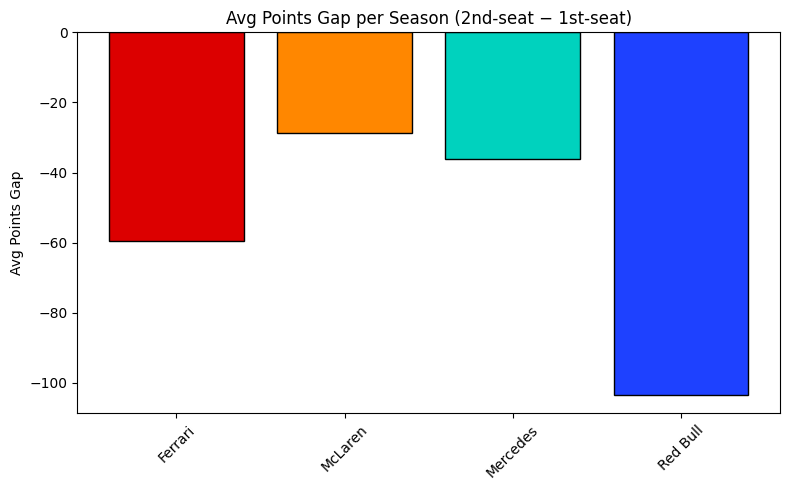

In [ ]:
colors = [pick_team_color(t) for t in summary_df['Team']]
plt.figure(figsize=(8,5))
plt.bar(summary_df['Team'], summary_df['Points Gap'], color=colors, edgecolor='black')
plt.title("Avg Points Gap per Season (2nd-seat − 1st-seat)")
plt.ylabel("Avg Points Gap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


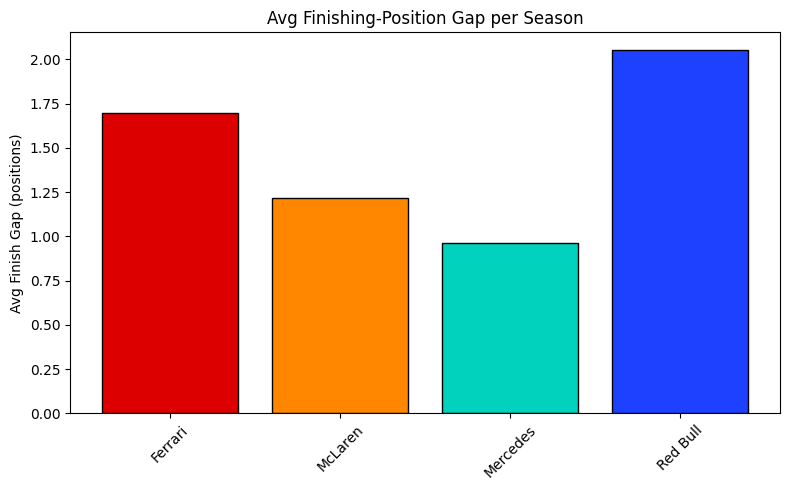

In [ ]:
colors = [pick_team_color(t) for t in summary_df['Team']]
plt.figure(figsize=(8,5))
plt.bar(summary_df['Team'], summary_df['Finishing Gap'], color=colors, edgecolor='black')
plt.title("Avg Finishing-Position Gap per Season")
plt.ylabel("Avg Finish Gap (positions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


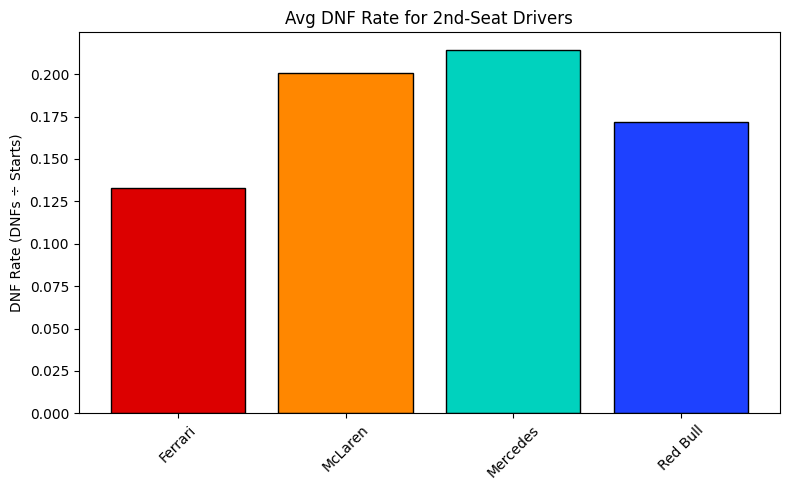

In [ ]:
colors = [pick_team_color(t) for t in summary_df['Team']]
plt.figure(figsize=(8,5))
plt.bar(summary_df['Team'], summary_df['DNF Rate'], color=colors, edgecolor='black')
plt.title("Avg DNF Rate for 2nd-Seat Drivers")
plt.ylabel("DNF Rate (DNFs ÷ Starts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

